In [1]:
# https://xcitech.github.io/tutorials/heroku_tutorial/
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas
import pandas as pd

import warnings
warnings.simplefilter('ignore', FutureWarning)

In [2]:
# Data source is '2015_CBQ_I.csv' from NHANES 'GrocerySpending' folder
# Columns originally named with question code (Example: CDB071)
# Columns renamed with descriptive question ID (Example: Grocery)
df = pd.read_csv('2015_GrocerySpend.csv', encoding='latin-1')

In [3]:
df.columns

Index(['SEQN', 'Grocery', 'Nonfood', 'Other', 'EatOut', 'Delivery'], dtype='object')

In [4]:
df.head()

,SEQN,Grocery,Nonfood,Other,EatOut,Delivery
0,83732,300.0,3.000000e+01,5.400000e-79,1.250000e+02,5.400000e-79
1,83733,200.0,5.400000e-79,5.000000e+01,4.000000e+01,5.400000e-79
2,83734,400.0,8.000000e+01,5.400000e-79,5.400000e-79,5.400000e-79
3,83735,300.0,1.000000e+02,2.500000e+02,5.000000e+01,5.400000e-79
4,83736,300.0,5.400000e-79,5.400000e-79,2.000000e+02,5.400000e-79


In [5]:
df.dtypes

SEQN          int64
Grocery     float64
Nonfood     float64
Other       float64
EatOut      float64
Delivery    float64
dtype: object

In [6]:
# Drop empty values and convert data to integer
df = df.dropna(how='any').astype(int)
df.head()

,SEQN,Grocery,Nonfood,Other,EatOut,Delivery
0,83732,300,30,0,125,0
1,83733,200,0,50,40,0
2,83734,400,80,0,0,0
3,83735,300,100,250,50,0
4,83736,300,0,0,200,0


In [7]:
df = df.drop(columns='SEQN')
df.head()

,Grocery,Nonfood,Other,EatOut,Delivery
0,300,30,0,125,0
1,200,0,50,40,0
2,400,80,0,0,0
3,300,100,250,50,0
4,300,0,0,200,0


In [8]:
# Limit data to Max value identified on documentation as valid data.
# 777777 = Refused to answer
# 999999 = Don't know
df = df[df.Grocery <= 400][df.Nonfood <= 150][df.Other <= 200][df.EatOut <= 200][df.Delivery <= 100]


/Users/bic/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


In [9]:
# Save all values divisible by 50 for later
df_50 = df[df['Grocery']%50==0]

In [10]:
# Create df with rows in which Grocery is divisible by 50
# These values create vertical clusters of data that throws of the best fit line
drop_index = df[df['Grocery']%50==0].index
df.drop(drop_index, inplace=True)
df.head()

,Grocery,Nonfood,Other,EatOut,Delivery
18,257,0,0,30,30
58,194,0,30,25,25
89,212,8,0,0,0
102,125,0,0,15,16
106,294,0,186,40,10


In [11]:
# A lot of clustered values at zero. Drop all rows with values = zero
# df = df[df != 0] 

In [12]:
df.describe()

,Grocery,Nonfood,Other,EatOut,Delivery
count,708.000000,708.000000,708.000000,708.000000,708.000000
mean,203.546610,13.224576,42.871469,47.368644,9.259887
std,98.540089,26.672865,54.013322,49.823831,19.165703
min,4.000000,0.000000,0.000000,0.000000,0.000000
25%,128.000000,0.000000,0.000000,0.000000,0.000000
50%,214.000000,0.000000,20.000000,30.000000,0.000000
75%,278.000000,20.000000,70.000000,75.000000,10.000000
max,399.000000,150.000000,200.000000,200.000000,100.000000


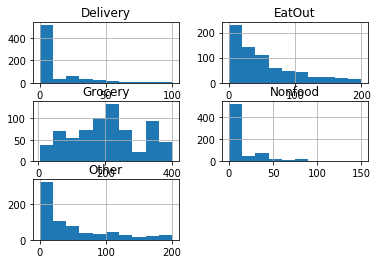

In [13]:
# Show sample histogram distribution of data
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
df.hist()
plt.show()

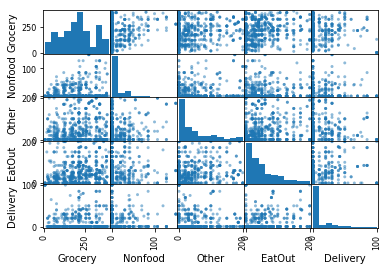

In [14]:
# Show matrix of scatter plot data for quick overview
scatter_matrix(df)
plt.show()

## Predict Other spending based on Grocery Spending

In [15]:
# Assign Grocery and Other to X and y
# ??? Reshape?
X = df.Grocery.values.reshape(-1, 1)
y = df.Other.values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)


Shape:  (708, 1) (708, 1)


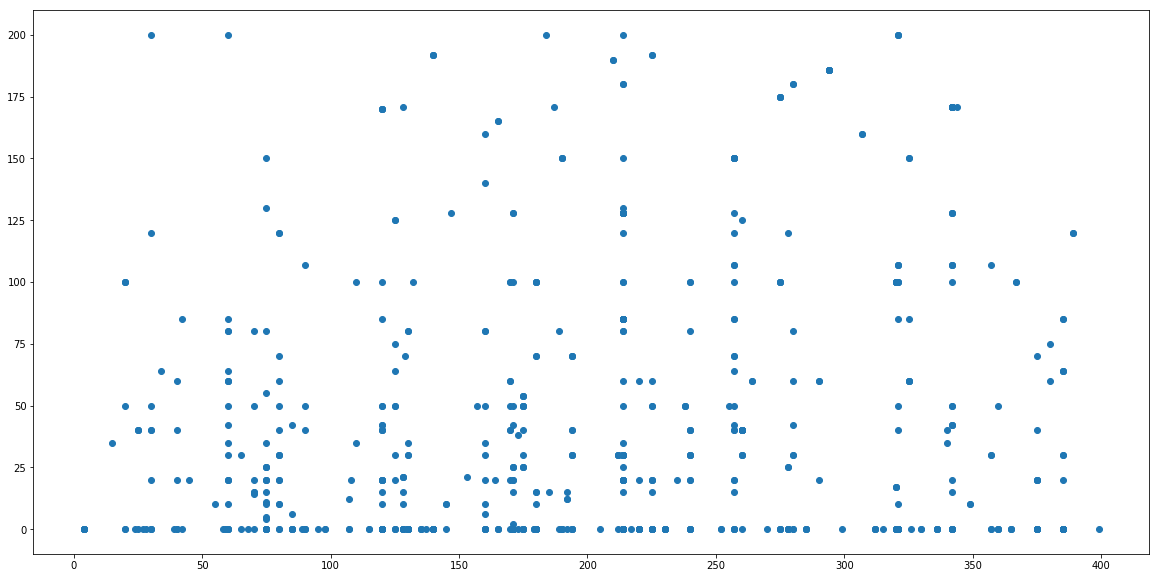

In [16]:
# Plot Grocery and Other as scatterplot
plt.figure(figsize=(20,10))
plt.scatter(X, y)
# Data shows negative correlation b/c as people spend more on Grocery, they spend less on food at Other stores.

In [17]:
# Used example of Example 21.1.2 Stu_LSD
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [18]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [19]:
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)

Weight coefficients:  [[0.06895565]]
y-axis intercept:  [28.83578009]


In [20]:
x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
print(f"Min X Value: {x_min}")
print(f"Max X Value: {x_max}")

Min X Value: [[4]]
Max X Value: [[399]]


In [21]:
y_min = model.predict(x_min)
y_max = model.predict(x_max)

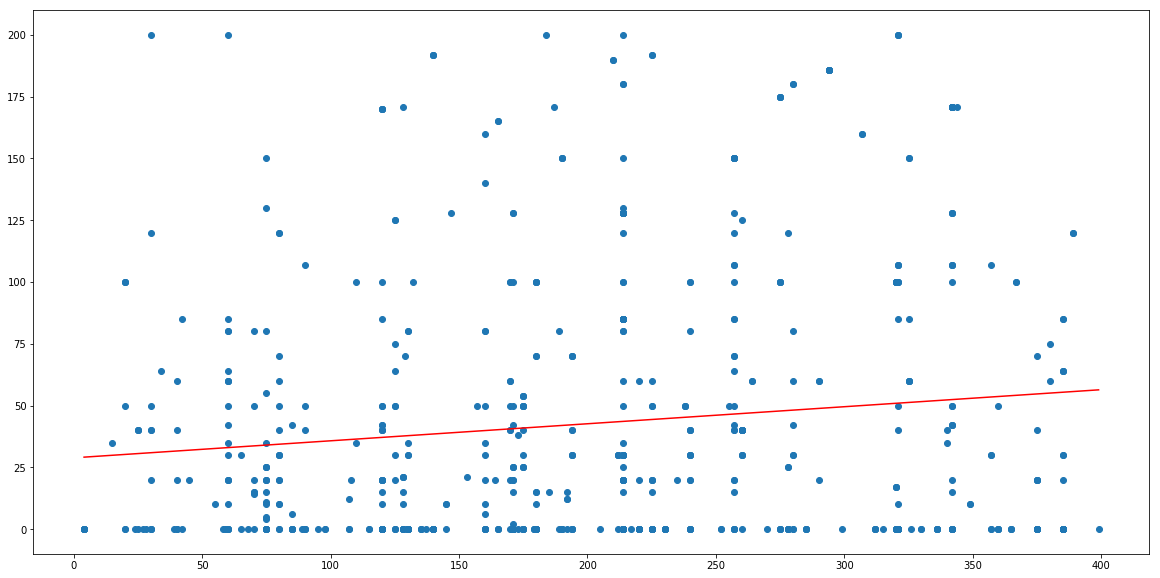

In [22]:
plt.figure(figsize=(20,10))
plt.scatter(X, y,)
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')
# Currently returns a very inaccurate predition. Close to b=0 line.

## Other test analysis

In [78]:
df_50.head()

,Grocery,Nonfood,Other,EatOut,Delivery
0,300,30,0,125,0
1,200,0,50,40,0
2,400,80,0,0,0
4,300,0,0,200,0
13,300,0,7,0,0


In [79]:
x_axis = df_50['Grocery']
# x_axis = np.arange(min(x_values), max(x_values), 50)
y_axis = df_50['Other'].mean()


In [80]:
tick_locations = [value for value in x_axis]

<BarContainer object of 2607 artists>

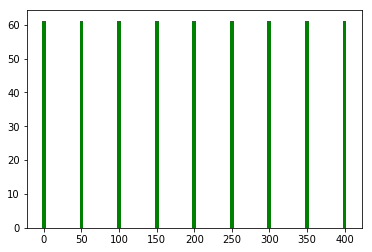

In [81]:
plt.bar(x_axis, y_axis, 5, color='green')


In [76]:
plt.figure(figsize=(20, 10))

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

In [77]:
plt.show

<function matplotlib.pyplot.show(*args, **kw)>